# Olografia
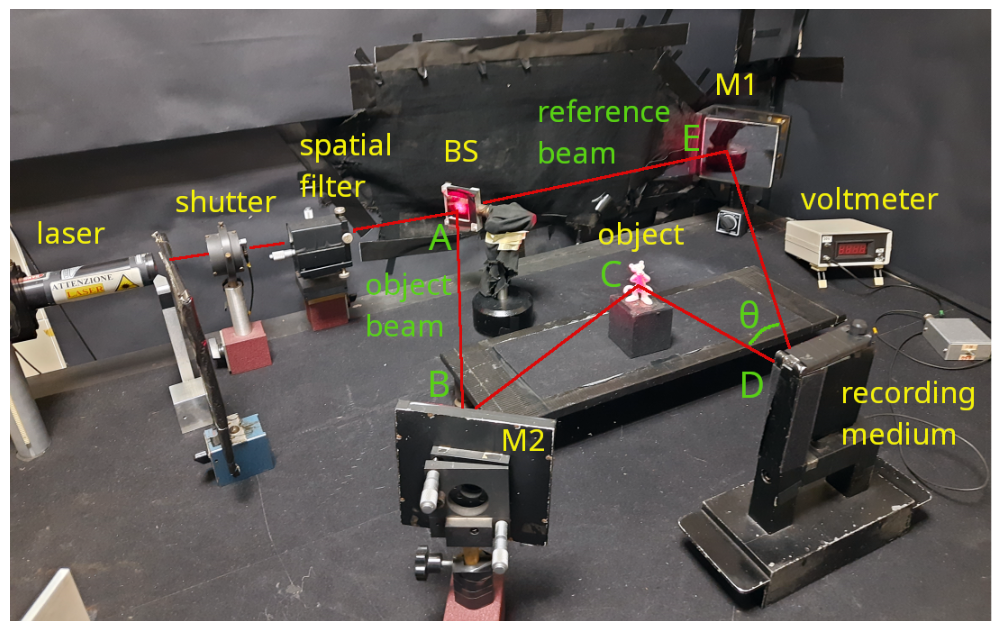

## Allineamento (04/11/2025)
Cerchiamo di creare un algoritmo per l'alineamento:
0) Partiamo avendo come riferimento due punti fissi: Il laser in ingresso e il supporto della piastrina fotosensibile
1) Posizioniamo il podio con l'oggetto circa davanti alla piastrina
2) Fissiamo XY di M2 vicino alla piastrina, in modo da illuminare il sogetto il più possibile frontalmente (in modo da massimizzare il segnale in arrivo sulla lastrina)
3) Fissiamo XY e $\phi$ di M1, in modo da creare un fascio di riferimento (Laser-M1-Piastrina) allienato.
4) Fissiamo XY del beam splitter in modo da creare due cammini ottici (fascio di riferimento e fascio oggetto) entro la lunghezza di coerenza del laser ($\lambda_C \sim 20\,\text{cm}$)
5) Fissiamo $\phi$ del beam splitter in modo da allineare il fascio Laser - Beam Splitter - M2.
6) Fissiamo $\phi$ di M2 per centrare l'oggetto (pantera rosa) sopra al podio
7) Eventuali spostamenti lungo l'asse perpendicolare alla superificie dello specchio M2 permettono di variare il cammino ottico del fascio oggetto, in caso questo non sia uguale (entro qualche centimetro) a quello del fascio di riferimento 

## Misura intensità luminosa sulla piastrina
Al fine di determinare il tempo di esposizione della piastrina (che ha bisogno di $50 \mu J/cm^2$) è necessario misurare con un fotodiodo l'intensità luminosa in arrivo su di essa. Per farlo dunque ci interessa il setup completo, con entrambi i fasci non oscurati, in modo da avere la configurazione analoga a quella con la piastrina fotosensibile.\\
Nonostante ciò, ci aspettiamo che, separando le intensità dei due fasci, comunque si riesca, sommandoli, a ricostruire l'intensità totale. Sia $I_o = $ instensità fascio oggetto e $I_r=$ intensità fascio di riferimento, $I_{piastrina}= I_o + I_r$.
L'intensità viene misurata con un fotodiodo e un volmetro collegato ad esso. Per tirare fuori l'intensità dal voltaggio è necessario conoscere la retta di calibrazione W-V individuata da $$W = -0.16925 + 2.6592  V_{tot}$$.

Di seguito il codice che crea un'interfaccia con tkinter, della potenza misurata. ogni zona corrisponde ad $1\,cm^2$, ovvero pari alla dimensione del fotodiodo stesso.

In [10]:
import tkinter as tk
from tkinter import *
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
from PIL import ImageGrab
import time

# --- Imposta colori chiari fissi ---
BG_COLOR = "white"      # sfondo finestra
FG_COLOR = "black"      # testo
BTN_BG   = "#f0f0f0"    # pulsante chiaro
BTN_FG   = "black"

# --- Dati ---
y = [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5]
x = [0, 1, 2, 3, 3, 2, 1, 0, 0, 1, 2, 3, 3, 2, 1, 0, 0, 1, 2, 3, 3, 2, 1, 0]
V_tot = np.array([
    1.21, 1.13, 0.99, 0.86, 1.02, 1.17, 1.25, 1.43,
    1.50, 1.40, 1.24, 1.03, 1.05, 1.25, 1.42, 1.54,
    1.37, 1.34, 1.21, 1.00, 0.87, 0.96, 1.04, 1.09
])

w = -0.16925 + 2.6592 * V_tot
norm = colors.Normalize(vmin=min(w), vmax=max(w))
try:
    cmap = cm.colormaps["Reds"]
except AttributeError:
    cmap = cm.get_cmap("Reds")

cell_size = 60
cols = max(x) + 1
rows = max(y) + 1
width = cols * cell_size
height = rows * cell_size
colorbar_width = 80
colorbar_steps = 200

# --- Finestra principale ---
root = tk.Tk()
root.title("Mappa Potenza Laser sulla Piastrina")
root.configure(bg=BG_COLOR)  # <<< forza tema chiaro

title = Label(root, text="Mappa Potenza Laser sulla Piastrina", font=("Arial", 16), bg=BG_COLOR, fg=FG_COLOR)
title.pack(pady=10)

canvas = tk.Canvas(root, width=width + colorbar_width + 50,
                   height=height + 40,
                   bg=BG_COLOR, highlightthickness=0)  # <<< canvas chiaro
canvas.pack(padx=10, pady=10)

# --- Disegna griglia ---
for i in range(len(x)):
    cx, cy = x[i], y[i]
    color = colors.to_hex(cmap(norm(w[i])))
    x0 = cx * cell_size + 20
    y0 = (rows - 1 - cy) * cell_size + 20
    canvas.create_rectangle(x0, y0, x0 + cell_size, y0 + cell_size,
                            fill=color, outline="gray")

# --- Colorbar ---
cb_x0 = width + 40
cb_y0 = 20
cb_y1 = height + 20

for i in range(colorbar_steps):
    frac = i / (colorbar_steps - 1)
    val = norm.vmin + frac * (norm.vmax - norm.vmin)
    color = colors.to_hex(cmap(norm(val)))
    y = cb_y1 - i * (height / colorbar_steps)
    canvas.create_rectangle(cb_x0, y, cb_x0 + 30,
                            y - (height / colorbar_steps),
                            outline=color, fill=color)

n_ticks = 5
for i in range(n_ticks):
    frac = i / (n_ticks - 1)
    val = norm.vmax - frac * (norm.vmax - norm.vmin)
    y = cb_y0 + frac * height
    canvas.create_text(cb_x0 + 40, y, text=f"{val:.2f}",
                       anchor="w", font=("Arial", 13), fill=FG_COLOR)
canvas.create_text(cb_x0 + 15, cb_y0 - 10, text="μW",
                   font=("Arial", 14), fill=FG_COLOR)

# --- Salvataggio finestra intera ---
def save_window_as_image():
    root.update()
    time.sleep(0.2)
    x = root.winfo_rootx()
    y = root.winfo_rooty()
    x1 = x + root.winfo_width()
    y1 = y + root.winfo_height()

    img = ImageGrab.grab(bbox=(x, y, x1, y1))
    img.save("Mappa_potenza_Laser.png")
    print("✅ Immagine salvata come 'Mappa_potenza_Laser.png'")

# --- Shortcut tastiera ---
def on_key_press(event):
    if event.char.lower() == 's':
        save_window_as_image()

root.bind("<Key>", on_key_press)

# --- Chiusura finestra / ESC ---
def on_close(event=None):
    root.destroy()

root.protocol("WM_DELETE_WINDOW", on_close)
root.bind("<Escape>", on_close)

root.mainloop()


/var/folders/1m/4kpq6_652mb_h_2ncxddc6mw0000gn/T/ipykernel_1890/435652579.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Reds")


✅ Immagine salvata come 'Mappa_potenza_Laser.png'
